<a href="https://colab.research.google.com/github/NDsasuke/Gradient-decent--simplex-method--Binary-linear-programming/blob/main/Gradient%20Descent/Neural_Network_Training_with_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries:

* numpy for numerical computations.
* sklearn.datasets.load_iris to load the Iris dataset.
* sklearn.preprocessing.StandardScaler to standardize the features.
* matplotlib.pyplot for data visualization.

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

Loading the Iris dataset:

* The dataset is loaded using load_iris() from sklearn.datasets.
* The features are stored in X, and the target (class labels) are stored in y.


In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Selecting only the first two features for simplicity
y = (iris.target != 0).astype(int)  # Binary classification: set class 0 as negative class, and classes 1 and 2 as positive class

Selecting and standardizing the features:

* The first two features are selected from X for simplicity.
* The StandardScaler is initialized to scale the features.
* The features in X are transformed using fit_transform() to have zero mean and unit variance.


In [4]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

Adding a bias term to the feature matrix:

* A column of ones is added to the left of X using np.c_[].
* The modified feature matrix is stored in X_b.

In [5]:
# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

Setting learning rate and number of iterations:

* The learning rate determines the step size for each update during gradient descent.
* learning_rate is set to 0.01, but you can adjust it as needed.
* n_iterations defines the number of iterations to perform during gradient descent.

In [6]:
# Set learning rate and number of iterations
learning_rate = 0.01
n_iterations = 1000

Defining the neural network architecture:

* The number of input units is set based on the shape of X_b.
* n_hidden represents the number of hidden units.
* n_output represents the number of output units.

In [7]:
# Define the neural network architecture
n_input = X_b.shape[1]
n_hidden = 4
n_output = 1

Initializing random weights for the neural network:

* The random seed is set to ensure reproducibility.
* Random weights are generated using np.random.randn() based on the specified architecture.


In [8]:
# Initialize random weights for the neural network
np.random.seed(42)
weights_1 = np.random.randn(n_input, n_hidden)
weights_2 = np.random.randn(n_hidden, n_output)

Sigmoid activation function:

* The sigmoid function is defined to compute the sigmoid activation.
* It returns the value between 0 and 1, representing the probability of the positive class.

In [9]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Performing gradient descent:

* A loop is used to iterate over the specified number of iterations.
* Forward propagation is performed to compute the hidden layer output and the final output.
* Backpropagation is performed to compute the gradients and update the weights.

In [10]:
# Perform gradient descent
for iteration in range(n_iterations):
    # Forward propagation
    hidden_output = sigmoid(X_b.dot(weights_1))
    output = sigmoid(hidden_output.dot(weights_2))

    # Backpropagation
    output_error = output - y.reshape(-1, 1)
    hidden_error = output_error.dot(weights_2.T) * (hidden_output * (1 - hidden_output))

    # Compute gradients
    gradients_2 = hidden_output.T.dot(output_error)
    gradients_1 = X_b.T.dot(hidden_error)

    # Update weights
    weights_2 -= learning_rate * gradients_2
    weights_1 -= learning_rate * gradients_1


Generating predictions:

* Forward propagation is performed again using the learned weights to generate predictions.
* A threshold of 0.5 is applied to classify instances as 0 or 1.

In [11]:
# Generate predictions
hidden_output = sigmoid(X_b.dot(weights_1))
y_pred = (sigmoid(hidden_output.dot(weights_2)) >= 0.5).astype(int)

Plotting the original data and the decision boundary:

* The original data points are plotted with different colors for each class.
* The decision boundary is computed from the learned weights and plotted to separate the classes.

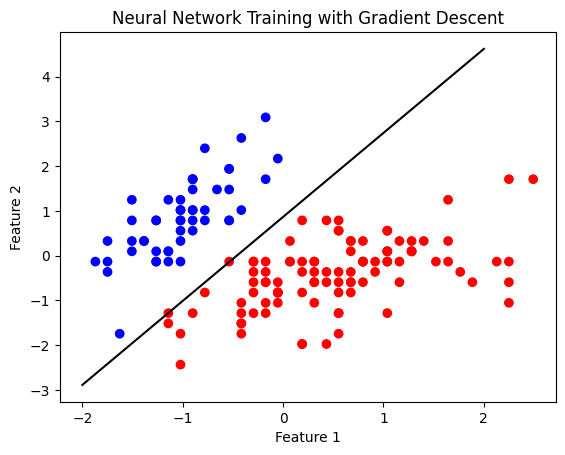

In [12]:
# Plot the original data and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
x1 = np.linspace(-2, 2, 100)
x2 = -(weights_1[0][0] + weights_1[1][0] * x1) / weights_1[2][0]
plt.plot(x1, x2, color='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Neural Network Training with Gradient Descent')
plt.show()